#### lets import some necessary libraries

This dataset can be utilized to explore the relationship between demographic/location factors and online food ordering behavior, analyze customer feedback to improve service quality, and potentially predict customer preferences or behavior based on demographic and location attributes.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [23]:
!pip install kaggle


In [24]:
#from google.colab import files
#uploaded = files.upload()

In [25]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/


mkdir: cannot create directory '/root/.kaggle': File exists
mv: cannot stat 'kaggle.json': No such file or directory


In [26]:
!kaggle datasets download -d sudarshan24byte/online-food-dataset

Dataset URL: https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset
License(s): MIT
online-food-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
#import zipfile
#with zipfile.ZipFile('online-food-dataset.zip', 'r') as zip_ref:
    #zip_ref.extractall('online-food-dataset')

In [28]:
import zipfile

# Define the path to the downloaded zip file
zip_file_path = 'online-food-dataset.zip'

# Define the destination folder where you want to extract the contents
destination_folder = 'online-food-dataset'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)


In [29]:
# Define the path to the CSV file within the extracted dataset folder
csv_file_path = 'online-food-dataset/onlinefoods.csv'

# Load the CSV file into a Pandas DataFrame
food_df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
print(food_df.head())


   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

In [30]:
food_df.shape

(388, 13)

In [31]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


- from above info we can infer that there is no null value present in the dataset

In [32]:
food_df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [33]:
# since last column 'unnamed' is not defined properly hence we can drop it
food_df.drop('Unnamed: 12', axis=1, inplace=True)

In [34]:
#lets recheck shape whether above column is dropped successfully
food_df.shape

(388, 12)

In [35]:
null_counts = food_df.isnull().sum()
null_counts

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [36]:
# from above info its clear that our data is completely filled with details and hence no missing value is present,
#now lets check the number of unique value present in each column

unique_counts = food_df.nunique()
unique_counts

Age                           16
Gender                         2
Marital Status                 3
Occupation                     4
Monthly Income                 5
Educational Qualifications     5
Family size                    6
latitude                      77
longitude                     76
Pin code                      77
Output                         2
Feedback                       2
dtype: int64

- for now we can go ahead to visualize our data as general cleaning is not required for eda

### Data Cleaning

In [37]:
# before moving for any analysis lets replace our target variable 'output' with new name 'Delivery' for better understanding

# Assuming 'old_column_name' is the current name of the column and 'new_column_name' is the new name
old_column_name = 'Output'
new_column_name = 'Delivery'

# Rename the column
food_df.rename(columns={old_column_name: new_column_name}, inplace=True)

In [38]:
# Lets recheck its implemented properly
food_df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Delivery,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


### EDA

### Univariate Analysis on Numerical Data

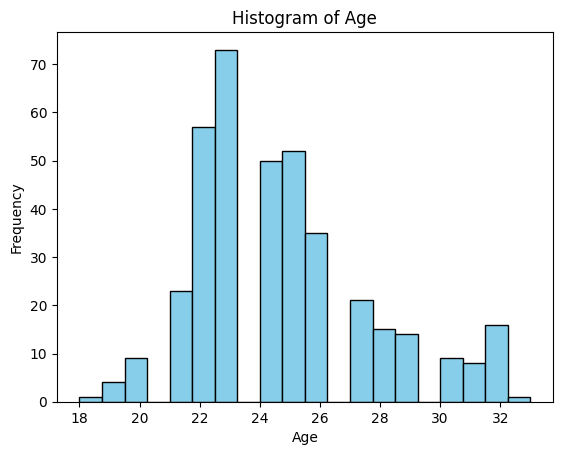

In [39]:
# Plot a histogram for Age

plt.hist(food_df['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Age')
plt.show()

- we can clearly see from above graph that age of 23 ordered maximum online food

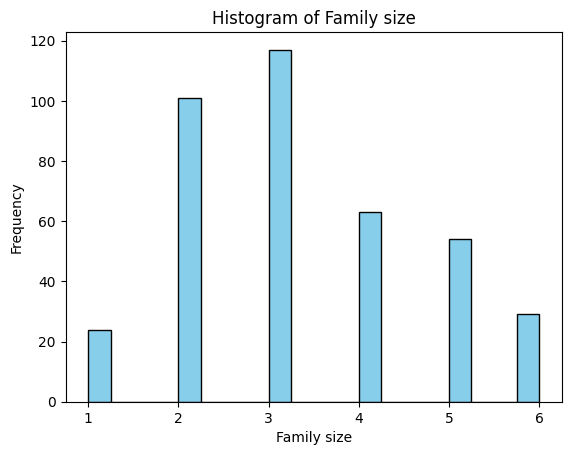

In [40]:
# Lets plot histogram for other numerical columns also

plt.hist(food_df['Family size'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Family size')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Family size')
plt.show()

- most of the families having members 2, 3 ordered maximum

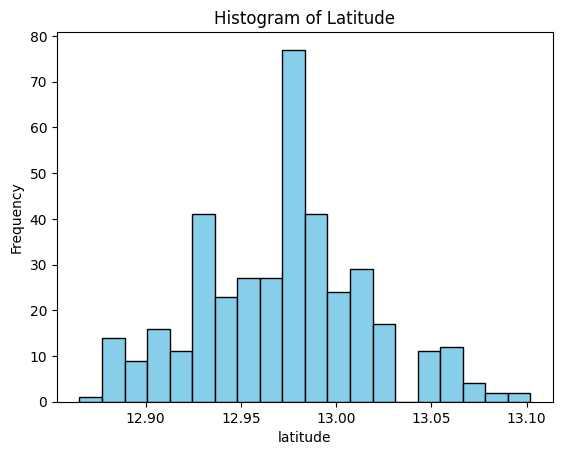

In [41]:
plt.hist(food_df['latitude'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('latitude')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Latitude')
plt.show()

- latitude of 12.98 ordered maximum

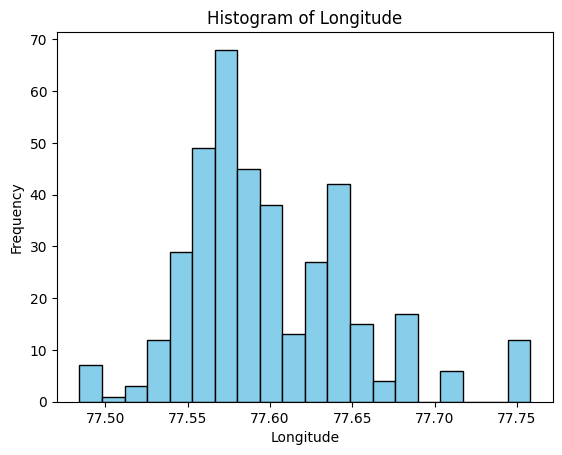

In [42]:
plt.hist(food_df['longitude'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Longitude')
plt.show()

- longitude of value 77.57 have maximum frequency

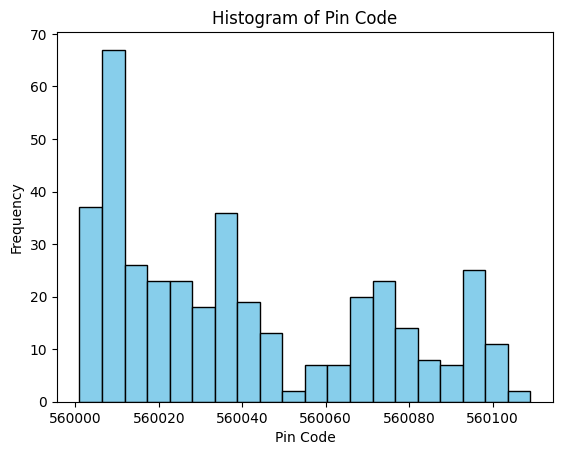

In [43]:
plt.hist(food_df['Pin code'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Pin Code')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'Pin Code')
plt.show()

- Pin code with 560005 to 560010 have maximum delivery

### Univariate Analysis on Categorical Data

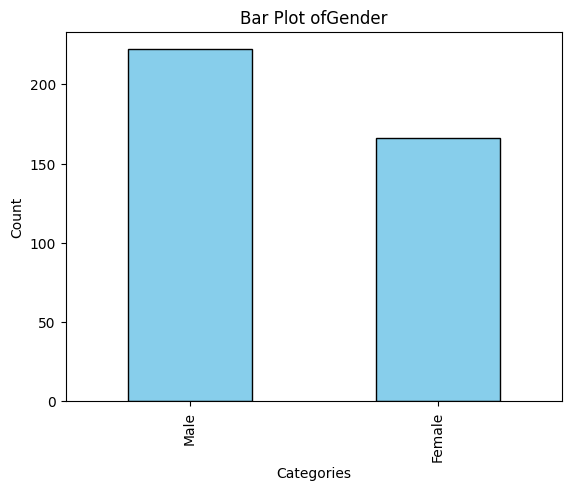

In [44]:
# Count the occurrences of each category
category_counts = food_df['Gender'].value_counts()

# Plot a bar plot
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of' + 'Gender')

# Show the plot
plt.show()

- Male have ordered more as compared to female which can be acceptable in general

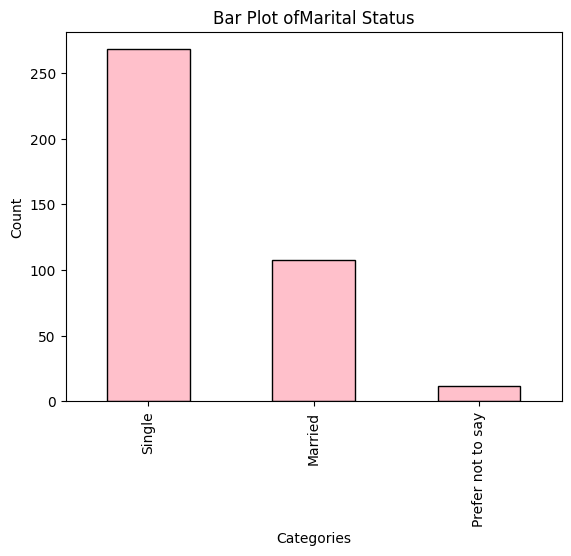

In [45]:
# Count the occurrences of each category
category_counts = food_df['Marital Status'].value_counts()

# Plot a bar plot
category_counts.plot(kind='bar', color='pink', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of' + 'Marital Status')

# Show the plot
plt.show()

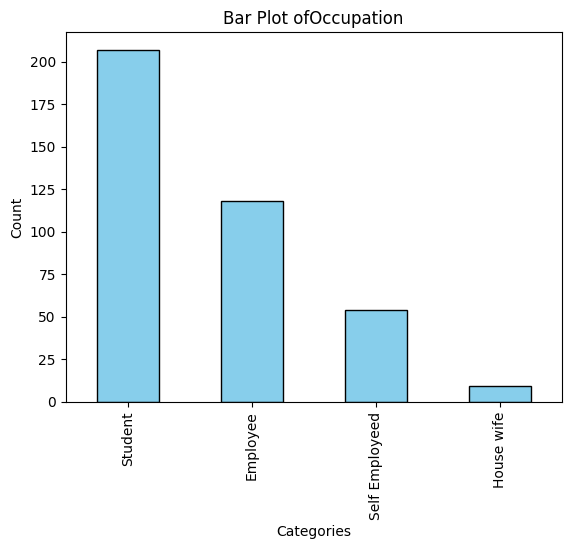

In [46]:
# Count the occurrences of each category
category_counts = food_df['Occupation'].value_counts()

# Plot a bar plot
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of' + 'Occupation')

# Show the plot
plt.show()

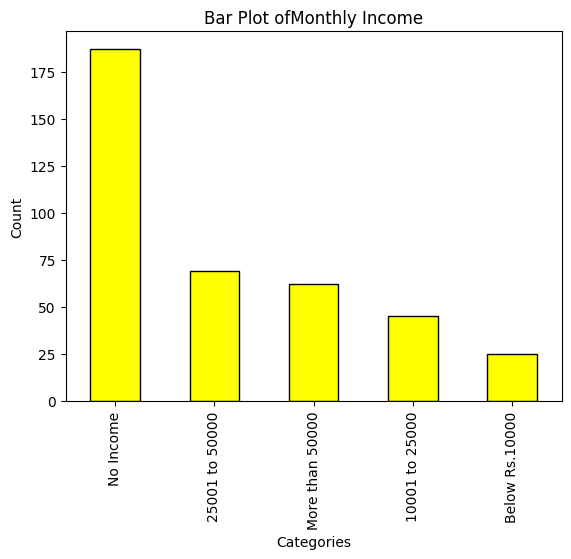

In [47]:
# Count the occurrences of each category
category_counts = food_df['Monthly Income'].value_counts()

# Plot a bar plot
category_counts.plot(kind='bar', color='yellow', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of' + 'Monthly Income')

# Show the plot
plt.show()

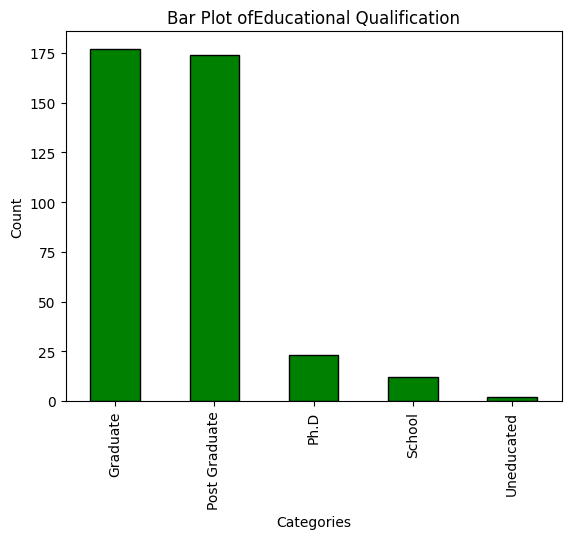

In [48]:
# Count the occurrences of each category
category_counts = food_df['Educational Qualifications'].value_counts()

# Plot a bar plot
category_counts.plot(kind='bar', color='green', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of' + 'Educational Qualification')

# Show the plot
plt.show()

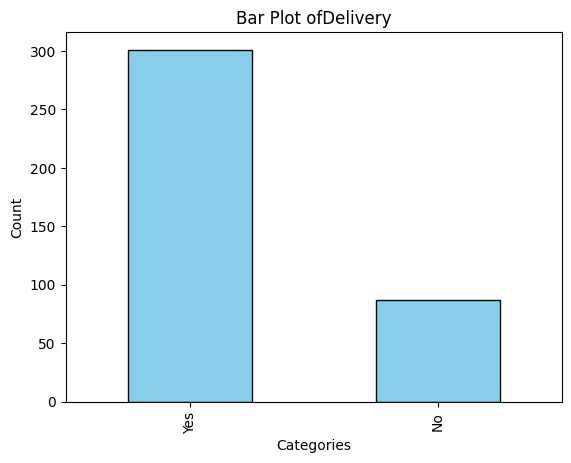

In [49]:
# Count the occurrences of each category
category_counts = food_df['Delivery'].value_counts()

# Plot a bar plot
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of' + 'Delivery')

# Show the plot
plt.show()

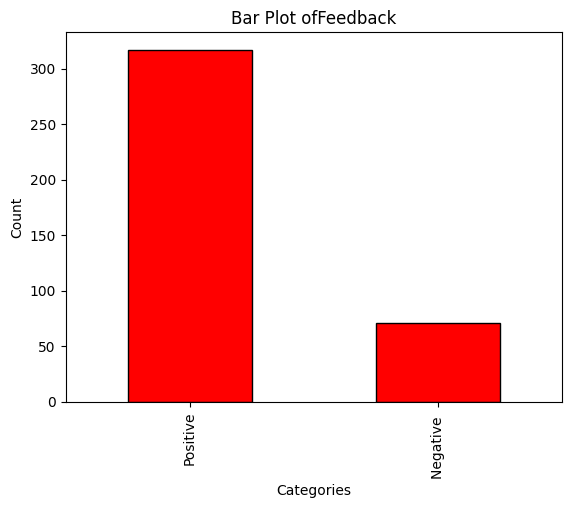

In [50]:
# Count the occurrences of each category
category_counts = food_df['Feedback'].value_counts()

# Plot a bar plot
category_counts.plot(kind='bar', color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of' + 'Feedback')

# Show the plot
plt.show()

### Bivariate Analysis for Numerical Data

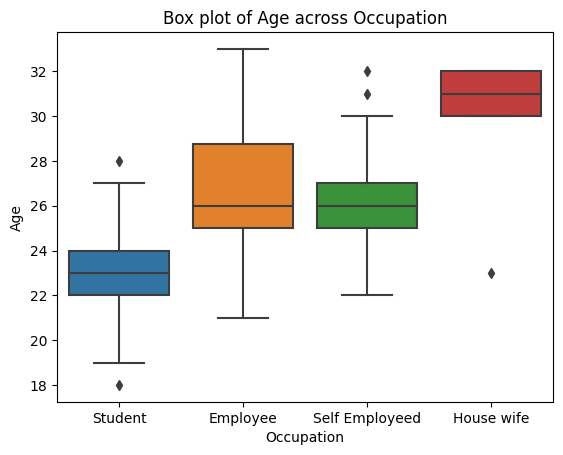

In [51]:
import seaborn as sns

# Box plot for Occupation vs Age
sns.boxplot(x='Occupation', y='Age', data=food_df)
plt.xlabel('Occupation')
plt.ylabel('Age')
plt.title('Box plot of ' + 'Age' + ' across ' + 'Occupation')
plt.show()

- since above plot is not helpful in providing useful info for analysis, lets consider target variable 'Delivery', to compare with all other variables

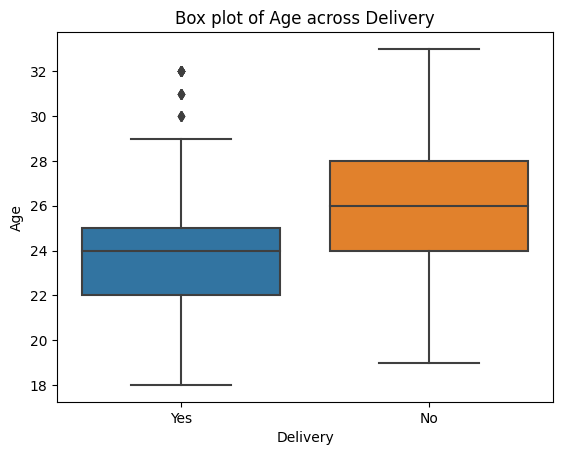

In [52]:
# Box plot for Delivery_status(output) vs Age
sns.boxplot(x='Delivery', y='Age', data=food_df)
plt.xlabel('Delivery')
plt.ylabel('Age')
plt.title('Box plot of ' + 'Age' + ' across ' + 'Delivery')
plt.show()

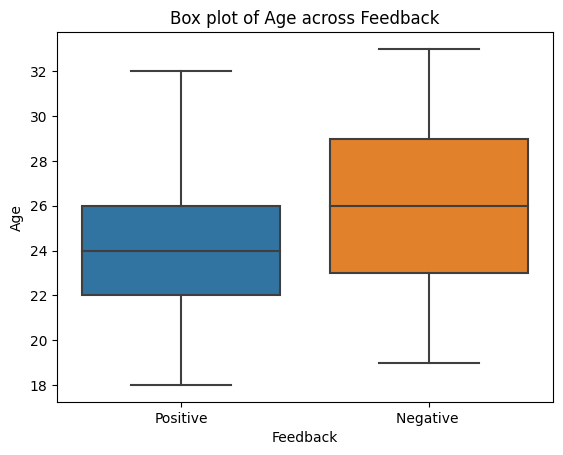

In [53]:
# Box plot for Feedback vs Age
sns.boxplot(x='Feedback', y='Age', data=food_df)
plt.xlabel('Feedback')
plt.ylabel('Age')
plt.title('Box plot of ' + 'Age' + ' across ' + 'Feedback')
plt.show()

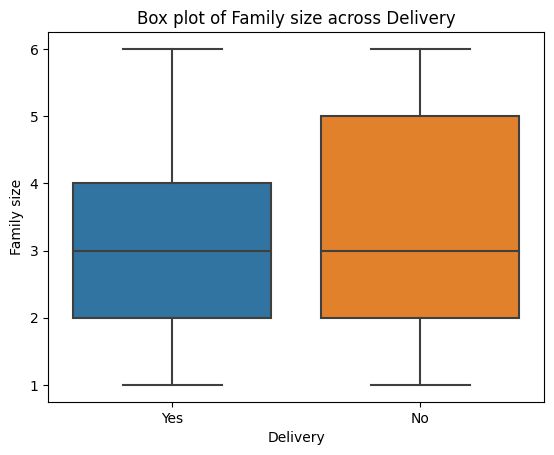

In [54]:
# Box plot for Delivery_status(output) vs family size
sns.boxplot(x='Delivery', y='Family size', data=food_df)
plt.xlabel('Delivery')
plt.ylabel('Family size')
plt.title('Box plot of ' + 'Family size' + ' across ' + 'Delivery')
plt.show()

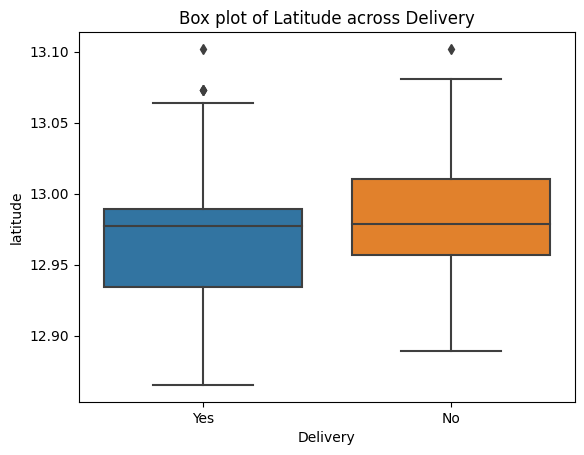

In [55]:
# Box plot for Delivery_status(output) vs Age
sns.boxplot(x='Delivery', y='latitude', data=food_df)
plt.xlabel('Delivery')
plt.ylabel('latitude')
plt.title('Box plot of ' + 'Latitude' + ' across ' + 'Delivery')
plt.show()

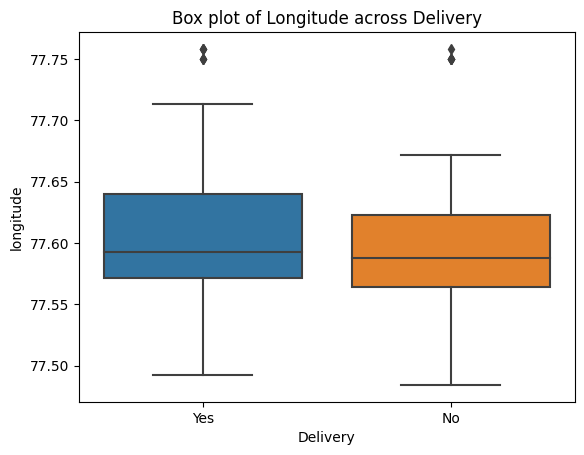

In [56]:
# Box plot for Delivery_status(output) vs Age
sns.boxplot(x='Delivery', y='longitude', data=food_df)
plt.xlabel('Delivery')
plt.ylabel('longitude')
plt.title('Box plot of ' + 'Longitude' + ' across ' + 'Delivery')
plt.show()

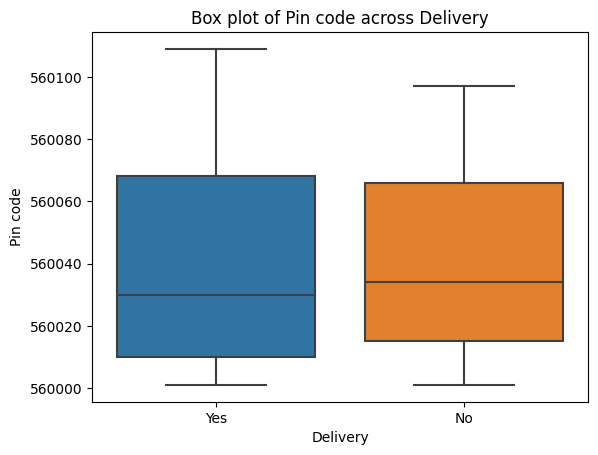

In [57]:
# Box plot for Delivery_status(output) vs Age
sns.boxplot(x='Delivery', y='Pin code', data=food_df)
plt.xlabel('Delivery')
plt.ylabel('Pin code')
plt.title('Box plot of ' + 'Pin code' + ' across ' + 'Delivery')
plt.show()

### Bivariate Analysis for categorical data

In [58]:
#1. Create a contingency table (cross-tabulation) for cat vs cat plot
contingency_table = pd.crosstab(food_df['Delivery'], food_df['Gender'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Gender    Female  Male
Delivery              
No            40    47
Yes          126   175


In [59]:
#2.
contingency_table = pd.crosstab(food_df['Delivery'], food_df['Marital Status'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Marital Status  Married  Prefer not to say  Single
Delivery                                          
No                   42                  6      39
Yes                  66                  6     229


In [60]:
# 3.
contingency_table = pd.crosstab(food_df['Delivery'], food_df['Occupation'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Occupation  Employee  House wife  Self Employeed  Student
Delivery                                                 
No                42           2              20       23
Yes               76           7              34      184


In [61]:
# 4.
contingency_table = pd.crosstab(food_df['Delivery'], food_df['Educational Qualifications'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Educational Qualifications  Graduate  Ph.D  Post Graduate  School  Uneducated
Delivery                                                                     
No                                50     7             27       2           1
Yes                              127    16            147      10           1


In [62]:
# 5.
contingency_table = pd.crosstab(food_df['Delivery'], food_df['Monthly Income'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Monthly Income  10001 to 25000  25001 to 50000  Below Rs.10000  \
Delivery                                                         
No                          13              27               6   
Yes                         32              42              19   

Monthly Income  More than 50000  No Income  
Delivery                                    
No                           18         23  
Yes                          44        164  


In [63]:
# 6.
contingency_table = pd.crosstab(food_df['Delivery'], food_df['Feedback'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

Contingency Table:
Feedback  Negative   Positive
Delivery                     
No               53        34
Yes              18       283


### Data PreProcessing

In [64]:
# since in above data we cannot see any column useless, hence keeping all the columns in df, we will proceed with mapping the categorical data with numerical
object_cols = food_df.select_dtypes(include='object').columns.tolist()
object_cols

['Gender',
 'Marital Status',
 'Occupation',
 'Monthly Income',
 'Educational Qualifications',
 'Delivery',
 'Feedback']

In [65]:
# Lets operate encoding on each type one by one
unique_genders = food_df['Gender'].unique()

# Display the unique values in the 'Gender' column
print("Unique genders present:")
for gender in unique_genders:
    print(gender)

Unique genders present:
Female
Male


In [66]:
# Define the mapping dictionary
gender_mapping = {'Female': 1, 'Male': 0}

# Map the values in the 'Gender' column using the mapping dictionary
food_df['Gender'] = food_df['Gender'].map(gender_mapping)

# Display the updated 'Gender' column
print(food_df['Gender'])


0      1
1      1
2      0
3      1
4      0
      ..
383    1
384    1
385    1
386    0
387    0
Name: Gender, Length: 388, dtype: int64


In [67]:
# Lets operate encoding on each type one by one
unique_mar_status = food_df['Marital Status'].unique()

# Display the unique values in the 'Gender' column
print("Unique Marital_status present:")
for marital_status in unique_mar_status:
    print(marital_status)

Unique Marital_status present:
Single
Married
Prefer not to say


In [68]:
# Define the mapping dictionary
mar_status_mapping = {'Prefer not to say': 0, 'Single': 1, 'Married': 2}

# Map the values in the 'Gender' column using the mapping dictionary
food_df['Marital Status'] = food_df['Marital Status'].map(mar_status_mapping)

# Display the updated 'Gender' column
food_df['Marital Status']

0      1
1      1
2      1
3      1
4      1
      ..
383    1
384    1
385    1
386    1
387    1
Name: Marital Status, Length: 388, dtype: int64

In [69]:
#Lets  do the same mapping for rest of the columns but before doing that, lets check unique values present in each column

# Get a list of all columns in the DataFrame
cat_columns = food_df.columns

# Iterate over each column
for column in cat_columns:
    # Check if the column is of type 'object' (string)
    if food_df[column].dtype == 'object':
        # Get the unique values in the column
        unique_values = food_df[column].unique()

        # Display the column name and its unique values
        print("Unique values present in column '{}':".format(column))
        for value in unique_values:
            print(value)


Unique values present in column 'Occupation':
Student
Employee
Self Employeed
House wife
Unique values present in column 'Monthly Income':
No Income
Below Rs.10000
More than 50000
10001 to 25000
25001 to 50000
Unique values present in column 'Educational Qualifications':
Post Graduate
Graduate
Ph.D
Uneducated
School
Unique values present in column 'Delivery':
Yes
No
Unique values present in column 'Feedback':
Positive
Negative 


In [70]:
# Mapping for remaining variables


occupation_mapping = {'Student': 0, 'House wife': 1, 'Employee': 2, 'Self Employeed': 3}
income_mapping = {'No Income': 0, 'Below Rs.10000': 5000, '10001 to 25000': 17500, '25001 to 50000': 37500, 'More than 50000': 60000}
education_mapping = {'Uneducated': 0, 'School': 1, 'Graduate': 2, 'Post Graduate': 3, 'Ph.D': 4}
delivery_mapping = {'No': 0, 'Yes': 1}


# Map the values in the 'Gender' column using the mapping dictionary
food_df['Occupation'] = food_df['Occupation'].map(occupation_mapping)
food_df['Monthly Income'] = food_df['Monthly Income'].map(income_mapping)
food_df['Educational Qualifications'] = food_df['Educational Qualifications'].map(education_mapping)
food_df['Delivery'] = food_df['Delivery'].map(delivery_mapping)



# Display all the updated or mapped columns
print(food_df['Occupation'])
print(food_df['Monthly Income'])
print(food_df['Educational Qualifications'])
print(food_df['Delivery'])

0      0
1      0
2      0
3      0
4      0
      ..
383    0
384    0
385    0
386    0
387    0
Name: Occupation, Length: 388, dtype: int64
0         0
1      5000
2      5000
3         0
4      5000
       ... 
383       0
384       0
385       0
386    5000
387       0
Name: Monthly Income, Length: 388, dtype: int64
0      3
1      2
2      3
3      2
4      3
      ..
383    3
384    3
385    3
386    3
387    3
Name: Educational Qualifications, Length: 388, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
383    1
384    1
385    1
386    1
387    1
Name: Delivery, Length: 388, dtype: int64


In [71]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Delivery                    388 non-null    int64  
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(9), object(1)
memory usage: 36.5+ KB


In [72]:
print(food_df['Feedback'].unique())

['Positive' 'Negative ']


In [73]:
# Define the mapping for 'Positive' and 'Negative' feedback
feedback_mapping = {'Positive': 1, 'Negative': 0}

# Strip leading and trailing whitespaces from the 'Feedback' column
food_df['Feedback'] = food_df['Feedback'].str.strip()

# Map the values in the 'Feedback' column using the mapping dictionary
food_df['Feedback'] = food_df['Feedback'].map(feedback_mapping)

# Display the 'Feedback' column to verify the mapping
print(food_df['Feedback'])

0      1
1      1
2      0
3      1
4      1
      ..
383    1
384    1
385    1
386    1
387    1
Name: Feedback, Length: 388, dtype: int64


In [74]:
#lets recheck dtype of all variables
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int64  
 2   Marital Status              388 non-null    int64  
 3   Occupation                  388 non-null    int64  
 4   Monthly Income              388 non-null    int64  
 5   Educational Qualifications  388 non-null    int64  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Delivery                    388 non-null    int64  
 11  Feedback                    388 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 36.5 KB


In [75]:
# Compute the correlation matrix
correlation_matrix = food_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                 Age    Gender  Marital Status  Occupation  \
Age                         1.000000 -0.062038        0.528712    0.585177   
Gender                     -0.062038  1.000000        0.030622   -0.084460   
Marital Status              0.528712  0.030622        1.000000    0.426765   
Occupation                  0.585177 -0.084460        0.426765    1.000000   
Monthly Income              0.557869 -0.143635        0.454067    0.795541   
Educational Qualifications -0.100036  0.074613       -0.156099   -0.205955   
Family size                 0.169982  0.082488        0.234065    0.083643   
latitude                    0.006595  0.046424       -0.095765   -0.041290   
longitude                   0.047500  0.059175        0.054594    0.165616   
Pin code                    0.137294 -0.035685        0.075926    0.155614   
Delivery                   -0.248052 -0.034701       -0.179587   -0.286715   
Feedback                   -0.198170  0.045486       -0.112861  

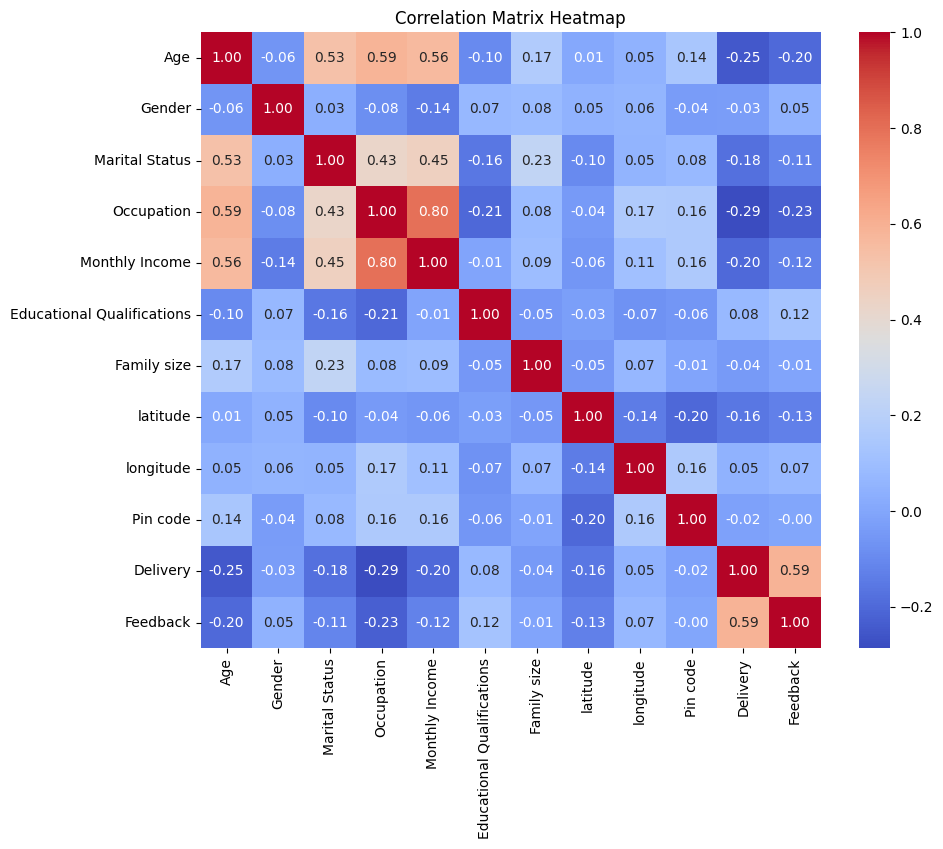

In [76]:
# Compute the correlation matrix
correlation_matrix = food_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

 if we see in above heatmap, we can conclude following observations:
- our target variable 'Delivery' is related strongly with feedback, which means those who ordered food, have given positive ratings, although it is of not much use in analysis
- a very less positive relation with longitude, which means correlation will not bemore useful in analysis
- hence we go for Bivariate Analysis conclusion

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [78]:
#Assuming 'data' is your DataFrame containing all the data including features and target variable
#'target_variable' is the name of your target variable column
X = food_df.drop(columns=['Delivery'])
#Assuming 'target_variable' is the name of your target variable column
y = food_df['Delivery']

In [79]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
from sklearn.feature_selection import RFE

# Step 1: Choose a model
model = LinearRegression()

# Step 2: Perform Feature Selection using RFE
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Step 3:  Get selected features
selected_features = X_train.columns[rfe.support_]

# Train the model using selected features
X_train_selected = X_train[selected_features]
model.fit(X_train_selected, y_train)


LinearRegression()

### Model Evaluation

### Model 1. Linear Regression

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
# Assuming X_test and y_test are the test features and target variable respectively

# Evaluate the model
X_test_selected = X_test[selected_features]
y_pred = model.predict(X_test_selected)


# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Mean Squared Error: 0.10834592505390016
R-squared: 0.1677063029950394


### Model 2 Polynomial Feature

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train and y_train are the training features and target variable respectively
# Assuming X_test and y_test are the test features and target variable respectively

# Define the degree of the polynomial
degree = 2  # You can adjust this value based on your data and experimentation

# Create a pipeline with PolynomialFeatures and LinearRegression
model2 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model on training data
model2.fit(X_train, y_train)

# Predict on test data
y_pred = model2.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Mean Squared Error: 0.14888222018059585
R-squared: -0.1436861459327594


### Model 3 Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

# Initialize Ridge regression model
ridge_model = Ridge(alpha=0.1)  # You can adjust the regularization strength (alpha)

# Fit the model
ridge_model.fit(X_train, y_train)

# Predict on test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate performance
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r_squared = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Ridge Regression R-squared:", ridge_r_squared)


Ridge Regression Mean Squared Error: 0.10502641411899659
Ridge Regression R-squared: 0.19320618244952592


###  Model 4 Gradient Boosting

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the model
gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r_squared = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Mean Squared Error:", gb_mse)
print("Gradient Boosting R-squared:", gb_r_squared)


Gradient Boosting Mean Squared Error: 0.08332384456748365
Gradient Boosting R-squared: 0.3599213758225117


### Model 5.Stacking Regression

In [85]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

# Initialize base models
base_models = [
    ('ridge', RidgeCV()),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Initialize stacking regressor with a meta-model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=RidgeCV())

# Fit the model
stacking_model.fit(X_train, y_train)

# Predict on test data
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate performance
stacking_mse = mean_squared_error(y_test, y_pred_stacking)
stacking_r_squared = r2_score(y_test, y_pred_stacking)

print("Stacking Mean Squared Error:", stacking_mse)
print("Stacking R-squared:", stacking_r_squared)


Stacking Mean Squared Error: 0.07428162158252045
Stacking R-squared: 0.4293820887524563


### Model 6 SVM Regression

In [86]:
from sklearn.svm import SVR

# Initialize SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

# Fit the model
svr_model.fit(X_train, y_train)

# Predict on test data
y_pred_svr = svr_model.predict(X_test)

# Evaluate performance
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r_squared = r2_score(y_test, y_pred_svr)

print("SVR Mean Squared Error:", svr_mse)
print("SVR R-squared:", svr_r_squared)


SVR Mean Squared Error: 114412426727.8409
SVR R-squared: -878895459862.869


### Model 7 Lasso Regression

In [87]:
from sklearn.linear_model import Lasso

# Initialize Lasso model
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict on test data
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate performance
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r_squared = r2_score(y_test, y_pred_lasso)

print("Lasso Mean Squared Error:", lasso_mse)
print("Lasso R-squared:", lasso_r_squared)


Lasso Mean Squared Error: 0.121335071147041
Lasso R-squared: 0.06792604437045746


### Model 8  Neural Network

In [88]:
import tensorflow as tf

# Define the neural network architecture
model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model8.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model8.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predict on test data
y_pred_nn = model8.predict(X_test)

# Evaluate performance
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r_squared = r2_score(y_test, y_pred_nn)

print("Neural Network Mean Squared Error:", nn_mse)
print("Neural Network R-squared:", nn_r_squared)


2024-05-09 11:36:04.100571: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 11:36:04.100751: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 11:36:04.285854: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Neural Network Mean Squared Error: 22580.385831727206
Neural Network R-squared: -173457.4184346318


### Model 9 KNN

In [89]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_r_squared = r2_score(y_test, y_pred_knn)

print("KNN Mean Squared Error:", knn_mse)
print("KNN R-squared:", knn_r_squared)


KNN Mean Squared Error: 0.09333333333333334
KNN R-squared: 0.28303030303030274


### Model 10 Grid Search

In [90]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize Gradient Boosting model with best parameters
best_gb_model = GradientBoostingRegressor(random_state=42, **best_params)

# Fit the model
best_gb_model.fit(X_train, y_train)

# Predict on test data
y_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate performance
best_gb_mse = mean_squared_error(y_test, y_pred_best_gb)
best_gb_r_squared = r2_score(y_test, y_pred_best_gb)

print("Best Gradient Boosting Mean Squared Error:", best_gb_mse)
print("Best Gradient Boosting R-squared:", best_gb_r_squared)


Best Gradient Boosting Mean Squared Error: 0.0878383861923379
Best Gradient Boosting R-squared: 0.3252414878861313


### Conclusion
- if we compare the MSE values of all the 10 model, Model 2 which is built using Plynomial feature extraction, we get highest which is apprx 15%, although it is not good enough
- for R-squared value, out of all the 10 models, Model 5, which was built using linear Reg stacking Regression achieved highest value i.e, apprx 43%